# CIFAR Classifier Module Demo
*Welcome to the demo of our lib CIFAR Classifier !*

A quick summary of what will be showed in this notebook :



1. Load resources
2. Train a BoVW model
3. Split the dataset into training and validation sets
4. Compute the BoVW descriptor for each image
5. Prepare training structures
6. Train a classifier and evaluate its performance
7. Display some results
8. Test on meme images
9. Compute the results on the test set and export them

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CIFAR_Classif.data_preprocess import load_data, unpickle
from CIFAR_Classif.generic_classifier import GenericClassifier
from CIFAR_Classif.generic_features_extractor import GenericFeaturesExtractor
from CIFAR_Classif.metrics import benchmark_models, benchmark_feature_extractors
from CIFAR_Classif.bovw import get_SIFT_kp_and_desc, get_bovw_features
from sklearn.model_selection import train_test_split
import cv2
from sklearn.cluster import KMeans


### Data loading and train/test separation

In [2]:
path_list = ['../data/cifar-10-batches-py/data_batch_5', '../data/cifar-10-batches-py/data_batch_4', '../data/cifar-10-batches-py/data_batch_3',
             '../data/cifar-10-batches-py/data_batch_2', '../data/cifar-10-batches-py/data_batch_1']

meta_path = '../data/cifar-10-batches-py/batches.meta'

labels_meaning = unpickle(meta_path)[b'label_names'] # List of the labels

# Load the data
X, y = load_data(path_list, apply_preprocess=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) # 15% of the data for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42) # 30% of 85% of the data for validation


## Bag of Visual Word 

### SIFT Features and BOVW computing

After some hand testing values we decided to take n_clusters=100 thus making 100 different visual words

In [3]:
keypoints, descriptors = get_SIFT_kp_and_desc(X)
features_vector = get_bovw_features(kps=keypoints, descs=descriptors, n_clusters=100)


Here we illustrate our SIFT features and our Bag of Visual Words with an histogram

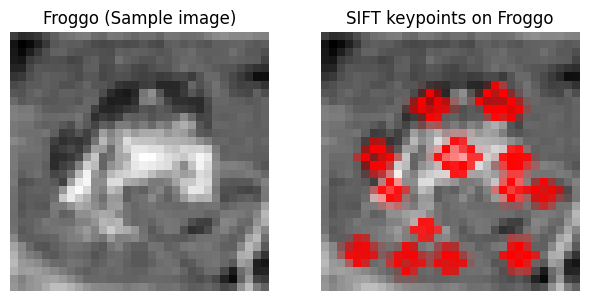

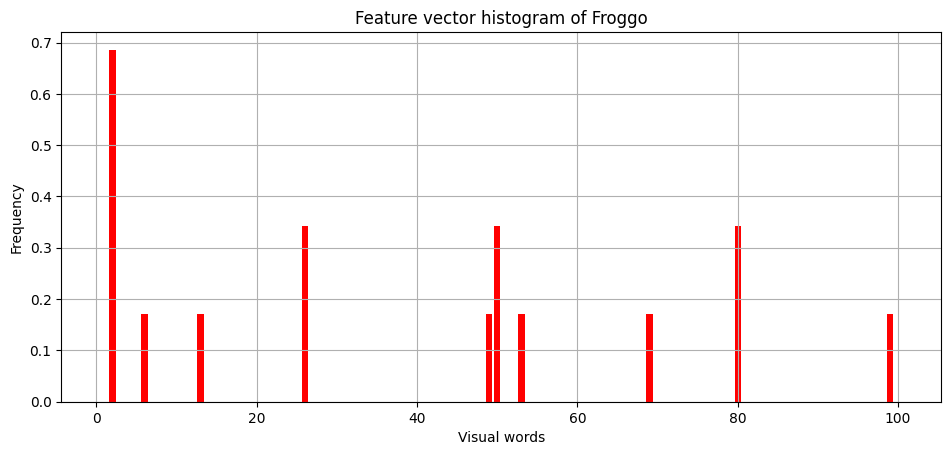

In [11]:
img = X[0]
plt.subplot(1, 3, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Froggo (Sample image)')
plt.axis('off')

sift_kp_img = cv2.drawKeypoints(img, keypoints[0], 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(1, 3, 2)
plt.imshow(sift_kp_img, cmap='gray')
plt.title('SIFT keypoints on Froggo')
plt.axis('off')

plt.subplots_adjust(right=1.5)
plt.show()

sample_feature_vector = features_vector[0]
plt.bar(np.arange(1, len(sample_feature_vector)+1), sample_feature_vector, color='red')
plt.xlabel('Visual words')
plt.ylabel('Frequency')
plt.title('Feature vector histogram of Froggo')
plt.grid()


plt.subplots_adjust(right=1.5)
plt.show()

## Features extraction

We chose to use the following feature extractors:
- Histogram of Gradient (HoG)
- Local Binary Pattern (LBP)

In [ ]:
features_train, features_test = benchmark_feature_extractors(X_train, X_test, feature_extractor_list=["hog", "lbp"])

hog_features_train = features_train["hog"]
hog_features_test = features_test["hog"]
lbp_features_train = features_train["lbp"]
lbp_features_test = features_test["lbp"]

## Models selection

We are comparing results from three different classifiers:

- SVC that is non-parametric and non linear.
- Logistic Regression that is parametric and linear.
- KNN that is non parametric and non linear.

In [ ]:
benchmark_models(hog_features_train, y_train, hog_features_test, y_test, model_list=["svc", "logistic_regression", "knn"])

------svc------
Accuracy: 0.3546666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.57      0.49       148
           1       0.48      0.44      0.46       170
           2       0.28      0.15      0.20       138
           3       0.24      0.15      0.19       144
           4       0.28      0.24      0.26       151
           5       0.36      0.26      0.30       140
           6       0.28      0.63      0.39       134
           7       0.30      0.32      0.31       146
           8       0.44      0.39      0.41       173
           9       0.43      0.37      0.40       156

    accuracy                           0.35      1500
   macro avg       0.35      0.35      0.34      1500
weighted avg       0.36      0.35      0.34      1500

------logistic_regression------


/home/spottedbush/.virtualenvs/cifar_classif/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.316
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.43      0.46       148
           1       0.41      0.35      0.37       170
           2       0.20      0.10      0.13       138
           3       0.25      0.11      0.15       144
           4       0.27      0.28      0.27       151
           5       0.31      0.28      0.30       140
           6       0.22      0.49      0.30       134
           7       0.24      0.32      0.27       146
           8       0.44      0.39      0.41       173
           9       0.38      0.38      0.38       156

    accuracy                           0.32      1500
   macro avg       0.32      0.31      0.31      1500
weighted avg       0.33      0.32      0.31      1500

------knn------
Accuracy: 0.224
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       148
           1       0.25      0.27     

In [ ]:
benchmark_models(hog_features_train, y_train, hog_features_test, y_test, model_list=["random_forest", "decision_tree", "gradient_boosting"])

------random_forest------
Accuracy: 0.3433333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       148
           1       0.38      0.34      0.36       170
           2       0.30      0.22      0.26       138
           3       0.23      0.20      0.22       144
           4       0.28      0.32      0.30       151
           5       0.33      0.28      0.30       140
           6       0.35      0.46      0.39       134
           7       0.31      0.34      0.32       146
           8       0.40      0.43      0.41       173
           9       0.38      0.36      0.37       156

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.34      1500

------decision_tree------
Accuracy: 0.20466666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.27      

KeyboardInterrupt: 

Pour le classifier KNN on effectue un GridSearch afin de connaître les hyperparamètres optimaux

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = GenericClassifier(kernel='KNN')
grid_search = knn.grid_search(param_grid, X_train, y_train, verbose=True)

ValueError: Invalid kernel. Choose from: ['svc', 'logistic_regression', 'random_forest', 'knn', 'decision_tree', 'gradient_boosting']